# Hotel Reservation Dataset - Revisited

---

*08/15/23*

**Revisiting the Hotels**

Previously used this dataset for a classification project with the goal of modeling the likelihood of a given reservation canceling

<i>New Approach</i>

This time, I'll use the "ReservationStatus" field to perform a multi-class classification model Such a model would be more useful in a practical sense

---

# Import Packages

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn import set_config
set_config(transform_output = 'pandas')

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 50)

%matplotlib inline

# Import Data

In [2]:
data_path_resort = './data/Resort_Data.xlsx'
data_path_city = './data/City_Data.xlsx'

In [3]:
data_resort = pd.read_excel(data_path_resort)
data_resort['HotelType'] = 'Resort'
data_resort.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelType
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort


In [4]:
data_city = pd.read_excel(data_path_city)
data_city['HotelType'] = 'City'
data_city.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelType
0,0,6,2015,July,27,1,0,2,1,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03,City
1,1,88,2015,July,27,1,0,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01,City
2,1,65,2015,July,27,1,0,4,1,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30,City
3,1,92,2015,July,27,1,2,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23,City
4,1,100,2015,July,27,2,0,2,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02,City


In [5]:
data_full = pd.concat([data_resort, data_city])
data_full.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelType
0,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort
1,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort
2,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort
3,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort
4,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort


# Feature Exploration

## Numeric Data

In [6]:
data_full.describe(include = ['number', 'datetime'], datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
IsCanceled,"119,390.00",0.37,0.00,0.00,0.00,1.00,1.00,0.48
LeadTime,"119,390.00",104.01,0.00,18.00,69.00,160.00,737.00,106.86
ArrivalDateYear,"119,390.00","2,016.16","2,015.00","2,016.00","2,016.00","2,017.00","2,017.00",0.71
ArrivalDateWeekNumber,"119,390.00",27.17,1.00,16.00,28.00,38.00,53.00,13.61
ArrivalDateDayOfMonth,"119,390.00",15.80,1.00,8.00,16.00,23.00,31.00,8.78
StaysInWeekendNights,"119,390.00",0.93,0.00,0.00,1.00,2.00,19.00,1.00
StaysInWeekNights,"119,390.00",2.50,0.00,1.00,2.00,3.00,50.00,1.91
Adults,"119,390.00",1.86,0.00,2.00,2.00,2.00,55.00,0.58
Children,"119,386.00",0.10,0.00,0.00,0.00,0.00,10.00,0.40
Babies,"119,390.00",0.01,0.00,0.00,0.00,0.00,10.00,0.10


In [7]:
data_full.select_dtypes(include = 'number').isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
BookingChanges                 0
DaysInWaitingList              0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

---

**Numeric Feature Review**

> Null or missing values:
> * Children
>
> 
> Features to drop:
> * IsCanceled (too similar to target feature)
>
>
> Treat as ordinal features:
> * ArrivalDateYear
> * ArrivalDateWeekNumber
> * ArrivalDateDayOfMonth
>
>
> Expect outliers in most of the features
> * Determine how to handle later
>   * Eg, Huber regressor can handle them, but other linreg models can't
>
> Features unlikely to be known prior to arrival/guest stay:
> * None, could make argument for all to be known due to reservation booking or calculated from reservation details (eg, number of changes)

---

## Non-Numeric (Strings, DateTime, or Categoricals)

In [8]:
data_full.describe(exclude = ['number', 'datetime'], datetime_is_numeric=True).T

,count,unique,top,freq
ArrivalDateMonth,119390,12,August,13877
Meal,119390,5,BB,92310
Country,118902,177,PRT,48590
MarketSegment,119390,8,Online TA,56477
DistributionChannel,119390,5,TA/TO,97870
ReservedRoomType,119390,10,A,85994
AssignedRoomType,119390,12,A,74053
DepositType,119390,3,No Deposit,104641
Agent,119390,334,9,31961
Company,119390,353,NULL,112593


In [9]:
data_full.select_dtypes(exclude = 'number').isna().sum()

ArrivalDateMonth           0
Meal                       0
Country                  488
MarketSegment              0
DistributionChannel        0
ReservedRoomType           0
AssignedRoomType           0
DepositType                0
Agent                      0
Company                    0
CustomerType               0
ReservationStatus          0
ReservationStatusDate      0
HotelType                  0
dtype: int64

---

**Non-Numeric Feature Review**

> Null or missing values:
>  * Country
>
> 
> Convert to ordinal: ArrivalDateMonth, Meal
>
> Further review needed:
> * MarketSegment vs DistributionChannel
> * ReservedRoomType == AssignedRoomType
> * Company value counts
> * ReservationStatus compared to IsCanceled (possibly too similar to target)
>
> Features unlikely to be known prior to arrival/guest stay:
> * Meal


---

In [10]:
data_full['ReservationStatus'].value_counts(normalize = True, ascending = False).round(2)

Check-Out   0.63
Canceled    0.36
No-Show     0.01
Name: ReservationStatus, dtype: float64

# Initial Data Processing

---

Prior to starting my detailed feature inspection, I need to change a few things:

1 Compare features `IsCanceled` and `ReservationStatus` to determine similarity
2 Convert `ArrivalDateMonth` from month names to month numbers (to treat as ordinal)

---

## Inspect Target Feature

In [11]:
data_full[['IsCanceled', 'ReservationStatus']].head()

,IsCanceled,ReservationStatus
0,0,Check-Out
1,0,Check-Out
2,0,Check-Out
3,0,Check-Out
4,0,Check-Out


In [12]:
data_full[['IsCanceled', 'ReservationStatus']].value_counts(normalize = False, ascending = False)

IsCanceled  ReservationStatus
0           Check-Out            75166
1           Canceled             43017
            No-Show               1207
dtype: int64

In [13]:
data_full[['IsCanceled', 'ReservationStatus']].value_counts(normalize = True, ascending = False).round(2)

IsCanceled  ReservationStatus
0           Check-Out           0.63
1           Canceled            0.36
            No-Show             0.01
dtype: float64

---

ReservationStatus consists of three classes, but the "No-Show" class makes up only 1% of the data

Previously, I considered it to be part of the "Canceled" class, but I want to see how well the model performs with the feature

---

## Inspect NaN/Missing Values

In [14]:
data_full[data_full['Children'].isna()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelType
540,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NULL,NULL,0,Transient-Party,12.00,0,1,Canceled,2015-08-01,City
607,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14,NULL,0,Transient-Party,12.00,0,1,Canceled,2015-08-04,City
619,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NULL,NULL,0,Transient-Party,18.00,0,2,Canceled,2015-08-04,City
1100,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9,NULL,0,Transient-Party,76.50,0,1,Canceled,2015-08-09,City


In [15]:
data_full[data_full['Country'].isna()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,HotelType
30,0,118,2015,July,27,1,4,10,1,0.00,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NULL,NULL,0,Transient,62.00,0,2,Check-Out,2015-07-15,Resort
4127,1,0,2016,February,8,15,0,0,0,0.00,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NULL,383,0,Transient,0.00,0,0,Canceled,2016-02-15,Resort
7092,1,8,2016,July,30,21,0,1,1,0.00,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NULL,204,0,Transient,73.00,0,2,Canceled,2016-07-20,Resort
7860,1,39,2016,August,36,30,0,5,2,0.00,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,159.00,0,5,Canceled,2016-07-22,Resort
8779,1,0,2016,October,42,13,0,1,1,0.00,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NULL,457,0,Transient,50.00,0,0,Canceled,2016-10-13,Resort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25848,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.00,0,0,Canceled,2017-04-10,City
25849,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.00,0,0,Canceled,2017-04-10,City
25850,1,0,2017,April,15,10,0,0,0,0.00,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.00,0,0,Canceled,2017-04-10,City
40770,0,4,2015,November,48,23,1,2,1,0.00,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37,NULL,0,Transient-Party,70.00,0,0,Check-Out,2015-11-26,City


---

With so few missing values, a SimpleImputer can easily handle the inputation of the most frequent values for each feature

---

In [16]:
data_full.loc[:, 'ArrivalDateMonth'].value_counts(normalize = True, ascending = False).round(2)

August      0.12
July        0.11
May         0.10
October     0.09
April       0.09
June        0.09
September   0.09
March       0.08
February    0.07
November    0.06
December    0.06
January     0.05
Name: ArrivalDateMonth, dtype: float64

In [17]:
cond = [data_full['ArrivalDateMonth'] == 'January',
        data_full['ArrivalDateMonth'] == 'February',
        data_full['ArrivalDateMonth'] == 'March',
        data_full['ArrivalDateMonth'] == 'April',
        data_full['ArrivalDateMonth'] == 'May',
        data_full['ArrivalDateMonth'] == 'June',
        data_full['ArrivalDateMonth'] == 'July',
        data_full['ArrivalDateMonth'] == 'August',
        data_full['ArrivalDateMonth'] == 'September',
        data_full['ArrivalDateMonth'] == 'October',
        data_full['ArrivalDateMonth'] == 'November',
        data_full['ArrivalDateMonth'] == 'December']

choice = [1,2,3,4,5,6,7,8,9,10,11,12]

data_full.loc[:, 'ArrivalDateMonth'] = np.select(cond, choice, "Error")

In [18]:
data_full.loc[:, 'ArrivalDateMonth'].value_counts(normalize = True, ascending = False).round(2)

8    0.12
7    0.11
5    0.10
10   0.09
4    0.09
6    0.09
9    0.09
3    0.08
2    0.07
11   0.06
12   0.06
1    0.05
Name: ArrivalDateMonth, dtype: float64

## Create "Arrival Day of Week"

In [19]:
cols_to_change = ['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']

print(data_full[cols_to_change].dtypes)
data_full[cols_to_change] = data_full[cols_to_change].astype(str)
data_full[cols_to_change].dtypes

ArrivalDateYear           int64
ArrivalDateMonth         object
ArrivalDateDayOfMonth     int64
dtype: object


ArrivalDateYear          object
ArrivalDateMonth         object
ArrivalDateDayOfMonth    object
dtype: object

In [20]:
# ## Adapted from https://stackoverflow.com/a/50504728abs

# temp_dates["combined"] = temp_dates["ArrivalDateYear"].str.cat(temp_dates[['ArrivalDateMonth', 'ArrivalDateDayOfMonth']].astype(str), sep="-")
# temp_dates["combined"]

In [21]:
data_full['arrivaldate'] = data_full['ArrivalDateYear'] + '-' +  data_full['ArrivalDateMonth'] + '-' + data_full['ArrivalDateDayOfMonth']
data_full['arrivaldate']

0         2015-7-1
1         2015-7-1
2         2015-7-1
3         2015-7-1
4         2015-7-1
           ...    
79325    2017-8-30
79326    2017-8-31
79327    2017-8-31
79328    2017-8-31
79329    2017-8-29
Name: arrivaldate, Length: 119390, dtype: object

In [22]:
data_full['arrivaldate'] = pd.to_datetime(data_full['arrivaldate'])
data_full['arrivaldate']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
79325   2017-08-30
79326   2017-08-31
79327   2017-08-31
79328   2017-08-31
79329   2017-08-29
Name: arrivaldate, Length: 119390, dtype: datetime64[ns]

In [23]:
## Use DT to get DoW
data_full['day_name'] = data_full['arrivaldate'].dt.day_name()
data_full['day_name']

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
79325    Wednesday
79326     Thursday
79327     Thursday
79328     Thursday
79329      Tuesday
Name: day_name, Length: 119390, dtype: object

In [24]:
data_full.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,7,7,7,7,7
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0.00,0.00,0.00,0.00,0.00


In [25]:
ord_cols = ['ArrivalDateMonth','ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'day_name']

data_full.loc[:, ord_cols] = data_full.loc[:, ord_cols].astype(str)
data_full.loc[:, ord_cols].dtypes

ArrivalDateMonth         object
ArrivalDateWeekNumber    object
ArrivalDateDayOfMonth    object
day_name                 object
dtype: object

## Drop Unused Columns

In [26]:
target= 'ReservationStatus'

df_for_model = data_full.drop(columns = ['IsCanceled', 'ReservationStatusDate', 'ArrivalDateYear', 'AssignedRoomType', 'arrivaldate']).copy()

df_for_model = df_for_model[df_for_model[target] != "No-Show"]

df_for_model

,LeadTime,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,HotelType,day_name
0,342,7,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,Resort,Wednesday
1,737,7,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,Resort,Wednesday
2,7,7,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,Resort,Wednesday
3,13,7,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,Resort,Wednesday
4,14,7,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,Resort,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,23,8,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,City,Wednesday
79326,102,8,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,City,Thursday
79327,34,8,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,City,Thursday
79328,109,8,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,City,Thursday


# Split the Data

In [27]:
## Splitting data into features and target variables.
target= 'ReservationStatus'

X = df_for_model.drop(columns = [target]).copy()
y = df_for_model[target].copy()

In [28]:
## Splitting - stratify to maintain class balance b/t X_train/_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .25, 
                                                    random_state=42, 
                                                    stratify=y)

# Create Column Transformers

In [29]:
## Specifying numeric columns for preprocessing
# cat_cols = X_train.select_dtypes(include='object').columns.to_list()
ord_cols = ['ArrivalDateMonth','ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', ]
cat_cols = X_train.drop(columns=ord_cols).select_dtypes(include='object').columns.to_list()
# cat_cols.remove('ArrivalDateDayOfMonth')
# cat_cols.remove('ArrivalDateMonth')
# cat_cols.remove('day_name')

In [30]:
## JMI 
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

X_train[ord_cols] = X_train[ord_cols].astype(int)
cat_cols

['Meal',
 'Country',
 'MarketSegment',
 'DistributionChannel',
 'ReservedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'HotelType',
 'day_name']

In [31]:
## Specifying numeric columns for preprocessing
num_cols = X_train.select_dtypes('number').columns.to_list()
num_cols.remove('ArrivalDateWeekNumber')
num_cols

['LeadTime',
 'ArrivalDateMonth',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

In [32]:
X_train.loc[:, num_cols].dtypes

LeadTime                         int64
ArrivalDateMonth                 int32
ArrivalDateDayOfMonth            int32
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
BookingChanges                   int64
DaysInWaitingList                int64
ADR                            float64
RequiredCarParkingSpaces         int64
TotalOfSpecialRequests           int64
dtype: object

In [33]:
X_train.loc[:, cat_cols].dtypes

Meal                   object
Country                object
MarketSegment          object
DistributionChannel    object
ReservedRoomType       object
DepositType            object
Agent                  object
Company                object
CustomerType           object
HotelType              object
day_name               object
dtype: object

In [34]:
# ord_cols = ['ArrivalDateMonth','ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'day_name'].astype(str)
# ord_cols

In [35]:
## Creating ColumnTransformer and sub-transformers for imputation and encoding

### --- Creating column pipelines --- ###

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False,
                                                max_categories=50 # to reduce feature set from 900 cols
                                                ))])

num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

# ord_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
#                            ('ordenc', OrdinalEncoder())])

### --- Instantiating the ColumnTransformer --- ###
preprocessor = ColumnTransformer(transformers=[('num', num_pipe, num_cols),
                                               ('cat', cat_pipe, cat_cols),
                                               # ('ord', ord_pipe, ord_cols)
                                              ], 
                                 verbose_feature_names_out=False
                                )

# full_pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                             ('model', DummyClassifier())])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['LeadTime', 'ArrivalDateMonth',
                                  'ArrivalDateDayOfMonth',
                                  'StaysInWeekendNights', 'StaysInWeekNights',
                                  'Adults', 'Children', 'Babies',
                                  'IsRepeatedGuest', 'PreviousCancellations',
                                  'PreviousBookingsNotCanceled',
                                  'BookingChanges', 'Day...
                                  'TotalOfSpecialRequests']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                max_categories=50,
                                                                sparse_output=False))]),
                                 ['Meal', 'Country', 'MarketSegment',
                                  'DistributionChannel', 'ReservedRoomType',
                                  'DepositType', 'Agent', 'Company',
                                  'CustomerType', 'HotelType', 'day_name'])],
                  verbose_feature_names_out=False)

In [36]:
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test) 
X_train_tf

,LeadTime,ArrivalDateMonth,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,Country_AGO,Country_ARG,Country_AUS,Country_AUT,Country_BEL,Country_BGR,Country_BRA,Country_CHE,Country_CHL,Country_CHN,Country_CN,Country_COL,Country_CZE,Country_DEU,Country_DNK,Country_DZA,Country_ESP,Country_EST,Country_FIN,Country_FRA,Country_GBR,Country_GRC,Country_HRV,Country_HUN,Country_IND,Country_IRL,Country_IRN,Country_ISR,Country_ITA,...,Company_202,Company_204,Company_218,Company_219,Company_221,Company_223,Company_227,Company_233,Company_238,Company_242,Company_269,Company_270,Company_280,Company_281,Company_307,Company_308,Company_331,Company_342,Company_348,Company_38,Company_385,Company_40,Company_405,Company_45,Company_46,Company_47,Company_498,Company_51,Company_62,Company_67,Company_68,Company_72,Company_86,Company_9,Company_91,Company_94,Company_infrequent_sklearn,CustomerType_Contract,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party,HotelType_City,HotelType_Resort,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
10348,-0.52,-1.48,1.39,-0.93,-0.26,0.25,-0.26,-0.09,-0.18,-0.10,-0.09,-0.34,-0.13,-1.30,-0.25,-0.72,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
45973,-0.93,-1.15,0.82,-0.93,0.26,0.25,-0.26,-0.09,-0.18,-0.10,-0.09,-0.34,-0.13,0.60,-0.25,-0.72,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3447,0.33,1.76,-0.66,-0.93,-1.31,0.25,-0.26,-0.09,-0.18,-0.10,-0.09,-0.34,-0.13,-1.99,-0.25,0.54,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50109,-0.68,-0.51,1.50,1.07,0.26,0.25,2.24,-0.09,-0.18,-0.10,-0.09,-0.34,-0.13,1.08,-0.25,0.54,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
14921,0.67,0.47,-1.69,0.07,1.30,0.25,2.24,-0.09,-0.18,-0.10,-0.09,-0.34,-0.13,0.25,-0.25,-0.72,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,..

In [37]:
# full_pipe.fit_transform(X_train)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier()
clf.fit(X_train_tf, y_train)

RandomForestClassifier()

In [40]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

              precision    recall  f1-score   support

    Canceled       0.89      0.81      0.85     10754
   Check-Out       0.90      0.94      0.92     18792

    accuracy                           0.89     29546
   macro avg       0.89      0.88      0.88     29546
weighted avg       0.89      0.89      0.89     29546



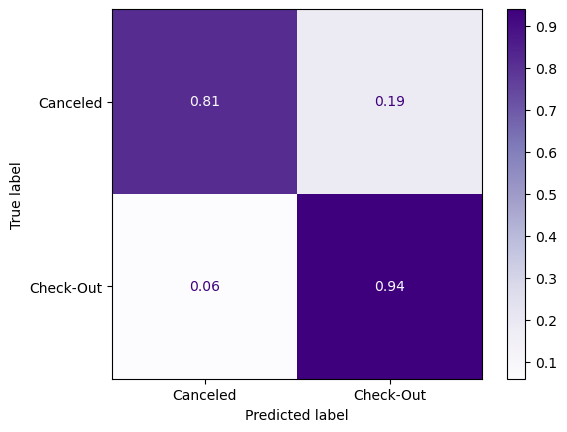

In [41]:
y_hat_test = clf.predict(X_test_tf)
print(classification_report(y_test,y_hat_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test, normalize='true', cmap='Purples')
      

<Axes: >

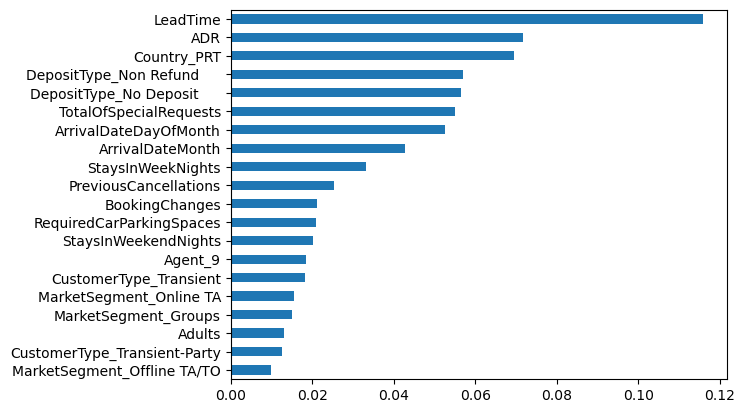

In [42]:
importances = pd.Series(clf.feature_importances_, index=clf.feature_names_in_)
importances.sort_values().tail(20).plot(kind='barh')

              precision    recall  f1-score   support

    Canceled       0.88      0.81      0.85     10754
   Check-Out       0.90      0.94      0.92     18792

    accuracy                           0.89     29546
   macro avg       0.89      0.88      0.88     29546
weighted avg       0.89      0.89      0.89     29546



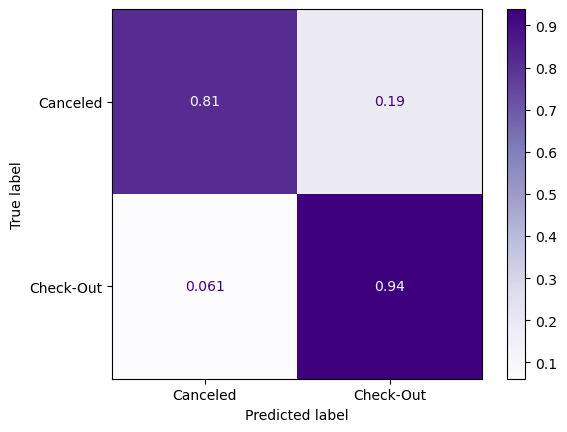

In [43]:
# Balanced
clf = RandomForestClassifier(class_weight='balanced')

clf.fit(X_train_tf, y_train)
y_hat_test = clf.predict(X_test_tf)
print(classification_report(y_test,y_hat_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test, normalize='true', cmap='Purples')
      

<Axes: >

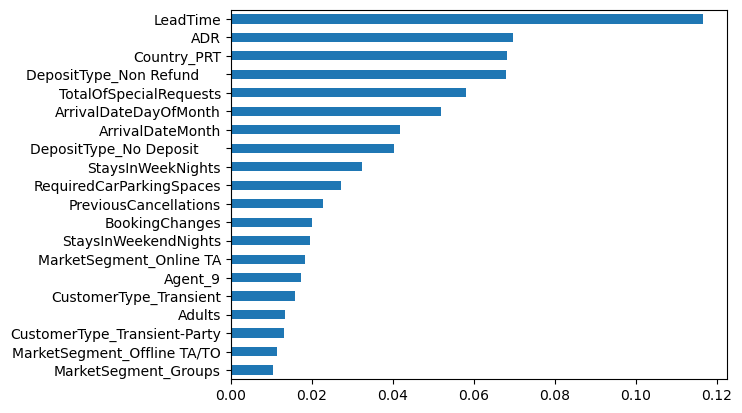

In [44]:
importances = pd.Series(clf.feature_importances_, index=clf.feature_names_in_)
importances.sort_values().tail(20).plot(kind='barh')

In [45]:
 ## Initializing Javascript for SHAP models
import shap
shap.initjs()

In [46]:
## Generating a sample of the overall data for review:
X_shap = shap.sample(X_test_tf, nsamples=50)

In [47]:
## Initializing an explainer with the RandomForestClassifier model
t_explainer = shap.TreeExplainer(clf)

## Check James's testing notebook for the updated SHAP code

In [48]:
## Calculating SHAP values for sample test data
shap_values = t_explainer.shap_values(X_shap)
len(shap_values)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 2.410726, while the model output was 0.185220. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
## Preparing column names for visualization labels
# X_shap.rename(columns = lambda x: x.title().replace('_', ' '), inplace=True)

In [ ]:
## Better plot
shap.summary_plot(shap_values[1],X_shap,max_display=15)